In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Read in the data from the CSV file
df = pd.read_csv('datasets/payment_fraud.csv')

In [3]:
df.sample(30)

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
12975,2000,1,5.034622,creditcard,1440.794444,0
38051,2000,1,4.836982,creditcard,620.527778,0
2770,2000,1,3.066058,paypal,0.177778,0
5667,596,1,4.921318,creditcard,0.000000,0
18689,3,1,4.524580,creditcard,2.167361,0
15597,474,1,5.034622,creditcard,375.209028,0
31982,303,1,4.921349,paypal,0.000000,0
31082,2000,1,4.745402,creditcard,211.025000,0
9740,2000,1,4.748314,creditcard,0.000000,0
12495,66,1,4.748314,paypal,63.927778,0


In [34]:
# Convert categorical feature into dummy variables with one-hot encoding
df = pd.get_dummies(df, columns=['paymentMethod'])
df.sample(3)

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit
38157,116,1,4.836982,0.009722,0,0,1,0
2638,363,1,4.895263,28.610417,0,1,0,0
29204,1676,1,4.895263,132.669444,0,0,1,0


In [35]:
# Split dataset up into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('label', axis=1), df['label'],
    test_size=0.33, random_state=17)

In [36]:
# Initialize and train classifier model
clf = LogisticRegression().fit(X_train, y_train)

# Make predictions on test set
y_pred = clf.predict(X_test)

/Users/mac7/opt/anaconda3/envs/myenvpy/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
# Compare test set predictions with ground truth labels
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_test, y_pred))

0.999922738159623
[[12753     0]
 [    1   189]]


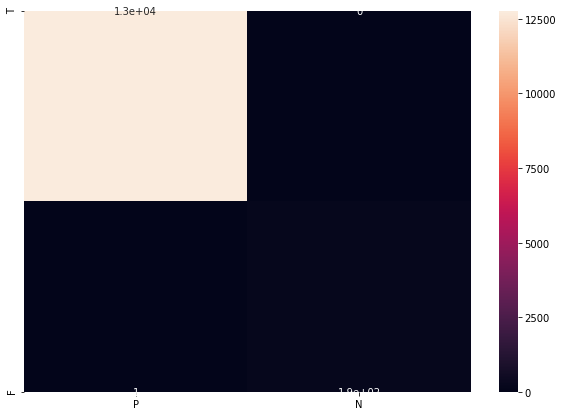

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = [i for i in "TF"],
                  columns = [i for i in "PN"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)